In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (11, 5)

In [2]:
df = pd.read_csv('~/.cache/webreport/march_2022/merge_samples.gz',dtype={"OE.ObservingEngine.currentObservingState": "string"})

In [3]:
df = df.fillna(method='ffill')
df = df.dropna()

column_names=['TimeStampLong',\
              'MACS.AzimuthAxis.position',\
              'MACS.AzimuthAxis.followingError',\
              'MACS.ElevationAxis.position',\
              'OE.ObservingEngine.currentObservingState',\
              'OE.ObservingEngine.slowGuideErrorA',\
              'OE.ObservingEngine.slowGuideErrorB',\
              'ECS.DomeRotation.actualPosition',\
              'ECS.UpperShutter.actualPosition',\
              'EMCS.WeatherStation.meanWindSpeed',\
              'EMCS.WeatherStation.windDirection'
              ]
df = df.reindex(columns=column_names)

In [4]:
df.drop(df[df['MACS.ElevationAxis.position']>90].index, inplace=True)
df.drop( df[df['OE.ObservingEngine.currentObservingState'] =='OFF' ].index, inplace=True)

In [5]:

def normalize_following_error(following_error, elevation):
    return abs(following_error) * math.cos(math.radians(elevation)) * 3600

df['MACS.AzimuthAxis.followingError'] = df.apply(
    lambda row: normalize_following_error(row['MACS.AzimuthAxis.followingError'], row['MACS.ElevationAxis.position']),
    axis=1)


In [6]:
df.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
184,2022-03-01 20:03:26.734577,-58.0179,0.042326,52.217245,SLEWING,0.0,0.0,302.584991,87.902496,12.799778,189.0
185,2022-03-01 20:03:26.913430,-58.0179,0.047846,52.217245,SLEWING,0.0,0.0,302.584991,87.902496,12.799778,189.0
186,2022-03-01 20:03:27.313429,-58.0179,0.019599,52.217245,SLEWING,0.0,0.0,302.584991,87.902496,12.799778,189.0
187,2022-03-01 20:03:28.313325,-58.0179,0.085992,52.217245,SLEWING,0.0,0.0,302.584991,87.902496,12.799778,189.0
188,2022-03-01 20:03:28.513334,-58.0179,0.019524,52.217245,SLEWING,0.0,0.0,302.584991,87.902496,12.799778,189.0


In [8]:
df.describe()

,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection
count,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06,2.436209e+06
mean,1.199893e+02,3.631320e-01,6.522547e+01,-8.805638e-08,1.031950e-08,2.048858e+02,7.961476e+01,5.876042e+00,1.631270e+02
std,1.155767e+02,9.845772e-01,1.655292e+01,6.042977e-07,6.657239e-07,1.046124e+02,2.551033e+01,3.358275e+00,7.066413e+01
min,-1.626485e+02,0.000000e+00,1.681753e-03,-2.710844e-05,-1.755423e-05,1.818180e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.341364e+01,6.309061e-03,5.440188e+01,-2.394921e-07,-8.286124e-08,1.215410e+02,8.747600e+01,3.141033e+00,1.160000e+02
50%,9.174461e+01,2.532986e-02,6.399136e+01,0.000000e+00,0.000000e+00,2.239070e+02,8.791780e+01,4.750811e+00,1.510000e+02
75%,2.139365e+02,1.190729e-01,7.976052e+01,9.852982e-08,2.388073e-07,2.915240e+02,8.793830e+01,8.582678e+00,1.740000e+02
max,3.531905e+02,1.178840e+01,8.999949e+01,1.216055e-05,1.759352e-05,3.600000e+02,8.794750e+01,1.720516e+01,3.590000e+02


In [9]:
print(df['OE.ObservingEngine.currentObservingState'].value_counts())

GUIDING     955858
TRACKING    800126
SLEWING     680225
Name: OE.ObservingEngine.currentObservingState, dtype: Int64


In [79]:
La primera pregunta es como afecta el viento al following error. Es decir, si el viento es fuerte, sube el following error. Para que el viento afecte, debería estar alineado azimuth con la compuerta. Por lo tanto lo primero es ver en que situaciones azimuth y compuerta están alineadas.

MACS.AzimuthAxis.followingError =\
    F ( MACS.AzimuthAxis.position, MACS.ElevationAxis.position, ECS.DomeRotation.actualPosition , EMCS.WeatherStation.meanWindSpeed, EMCS.WeatherStation.windDirection )

Para ello tengo que agrupar los valores en bins. Todos son valores de angulos menos velocidad del viento. Podría agruparlos por valores de 15.

Realmente lo que quiero saber es si:

MACS.AzimuthAxis.followingError =\
    F (  EMCS.WeatherStation.meanWindSpeed )

En aquellos casos en que está alineado MACS.AzimuthAxis.position , ECS.DomeRotation.actualPosition y con EMCS.WeatherStation.windDirection.

O si,

MACS.AzimuthAxis.followingError =\
    F (  EMCS.WeatherStation.meanWindSpeed, MACS.ElevationAxis.position  )

En aquellos casos en que está alineado MACS.AzimuthAxis.position , ECS.DomeRotation.actualPosition y con EMCS.WeatherStation.windDirection.



SyntaxError: invalid syntax (3644315738.py, line 1)

In [12]:
df_following_star = df[( df['OE.ObservingEngine.currentObservingState'] =='TRACKING' ) | ( df['OE.ObservingEngine.currentObservingState'] =='GUIDING' ) ]

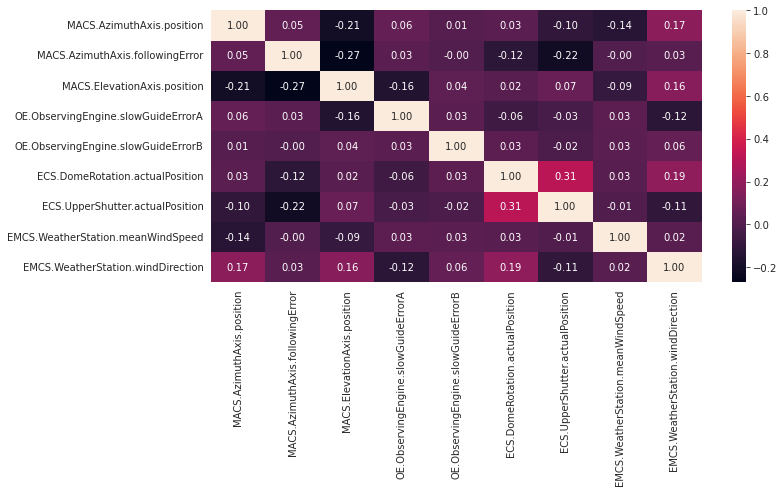

In [23]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [24]:
Para saber si azimuth y dirección del viento están alineados y si cuando sucede esto y la fuerza del viento es fuerte, aumenta el following error.

SyntaxError: invalid syntax (712045750.py, line 1)

In [28]:
df_following_star[ [ 'MACS.AzimuthAxis.position','ECS.DomeRotation.actualPosition'] ]

,MACS.AzimuthAxis.position,ECS.DomeRotation.actualPosition
190,-58.017900,302.584991
191,-58.017900,302.584991
192,-58.017900,302.584991
193,-58.017900,302.584991
194,-58.017900,302.584991
...,...,...
4291238,90.287957,291.523987
4291240,90.287957,291.523987
4291242,90.287957,291.523987
4291244,90.287957,291.523987


In [66]:
conditions = [ abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition']) < 15,
               abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition']) > 15]
choices = [1,0]
df_following_star['Azimuth.Align.Dome'] = np.select(conditions, choices, default='Tie')
df_following_star['Azimuth.Align.Dome'] = df_following_star['Azimuth.Align.Dome'].astype('int')

/tmp/ipykernel_225759/409988747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['Azimuth.Align.Dome'] = np.select(conditions, choices, default='Tie')
/tmp/ipykernel_225759/409988747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['Azimuth.Align.Dome'] = df_following_star['Azimuth.Align.Dome'].astype('int')


In [76]:
 df_following_star['MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition'] = abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition'])

/tmp/ipykernel_225759/3370416041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_following_star['MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition'] = abs(df_following_star['MACS.AzimuthAxis.position']  - df_following_star['ECS.DomeRotation.actualPosition'])


In [77]:
df_following_star.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,Azimuth.Align.Dome,MACS.AzimuthAxis.position_diff_ECS.DomeRotation.actualPosition
190,2022-03-01 20:03:28.734467,-58.0179,0.195146,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
191,2022-03-01 20:03:28.913328,-58.0179,0.048017,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
192,2022-03-01 20:03:29.113335,-58.0179,0.171821,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,189.0,0,360.602891
193,2022-03-01 20:03:29.184878,-58.0179,0.171821,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,183.0,0,360.602891
194,2022-03-01 20:03:29.313325,-58.0179,0.033719,52.217245,TRACKING,0.0,0.0,302.584991,87.902496,12.799778,183.0,0,360.602891


In [68]:
df_azimuth_align_dome =  df_following_star[( df_following_star['Azimuth.Align.Dome'] == 1 ) ]

In [69]:
df_azimuth_align_dome.head()

,TimeStampLong,MACS.AzimuthAxis.position,MACS.AzimuthAxis.followingError,MACS.ElevationAxis.position,OE.ObservingEngine.currentObservingState,OE.ObservingEngine.slowGuideErrorA,OE.ObservingEngine.slowGuideErrorB,ECS.DomeRotation.actualPosition,ECS.UpperShutter.actualPosition,EMCS.WeatherStation.meanWindSpeed,EMCS.WeatherStation.windDirection,Azimuth.Align.Dome
20267,2022-03-02 01:56:41.073836,12.102728,0.255026,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,164.0,1
20268,2022-03-02 01:56:41.113334,12.102728,0.220852,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,164.0,1
20269,2022-03-02 01:56:41.184831,12.102728,0.220852,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1
20270,2022-03-02 01:56:41.313335,12.102728,0.262219,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1
20271,2022-03-02 01:56:41.513335,12.102728,0.193358,65.0094,TRACKING,0.0,0.0,11.8245,87.902496,11.749756,168.0,1


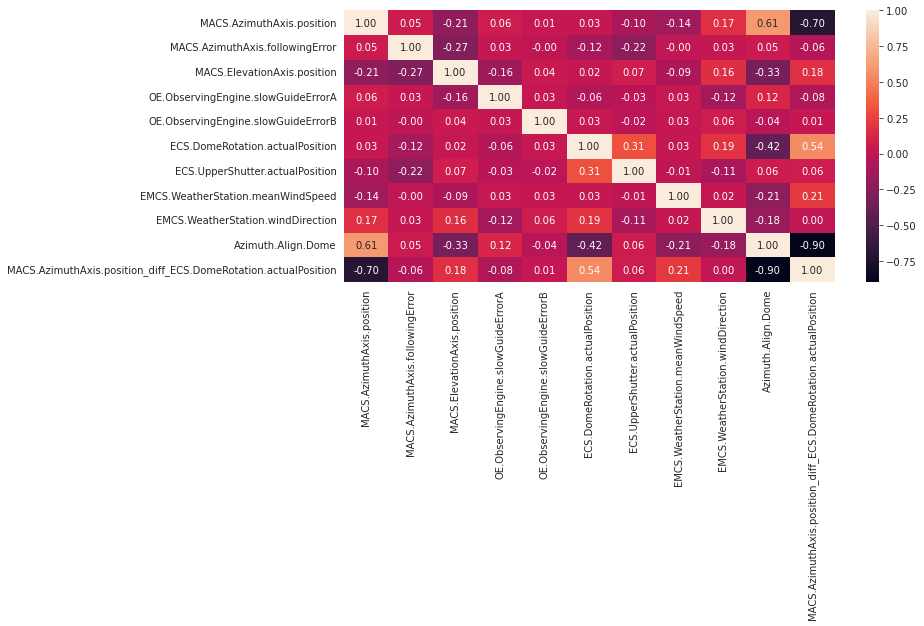

In [78]:
sns.heatmap(df_following_star.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
wind_speed_vals = df_following_star.groupby(pd.cut(df_following_star['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.meanWindSpeed'].max()

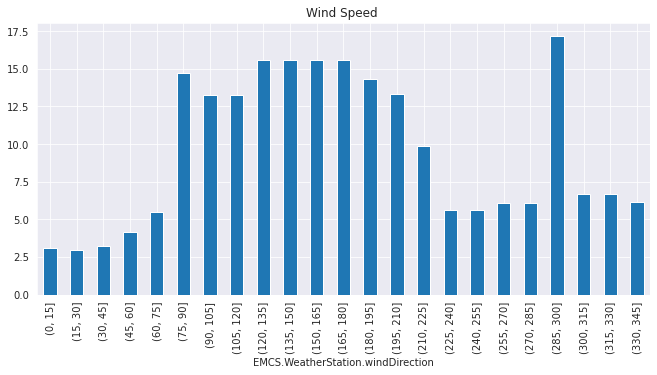

In [19]:
(wind_speed_vals).plot(kind="bar");
plt.title("Wind Speed ");

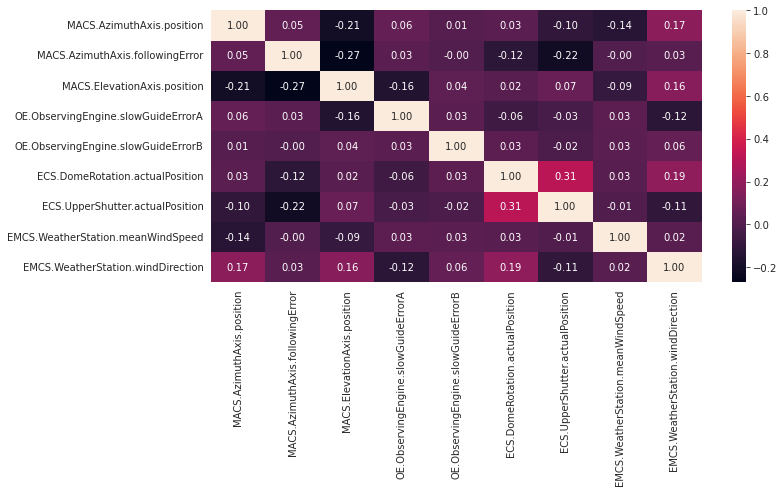

In [41]:
elevation_vals = df_track.groupby(pd.cut(df_track['MACS.ElevationAxis.position'], np.arange(20, 90, 5)))['MACS.ElevationAxis.position'].count()

NameError: name 'df_track' is not defined

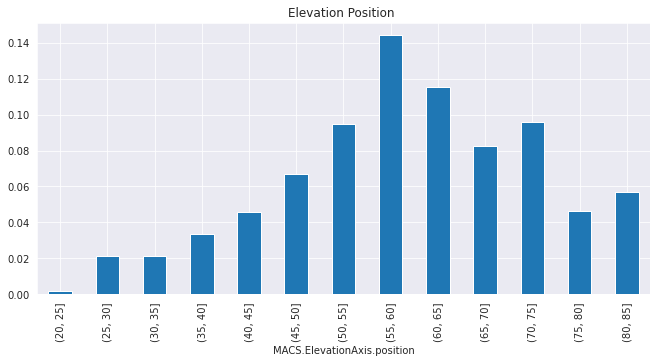

In [365]:
(elevation_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Elevation Position ");

In [366]:
azimuth_vals = df_track.groupby(pd.cut(df_track['MACS.AzimuthAxis.position'], np.arange(-175.7, 355.7, 15)))['MACS.AzimuthAxis.position'].count()

In [ ]:
Para el estudio del viento, normalizar azimuth para angulos equivalentes

In [392]:
df.apply(lambda  x: 360 + x['MACS.AzimuthAxis.position'] , axis=1 )

184        301.982100
185        301.982100
186        301.982100
187        301.982100
188        301.982100
              ...    
4291263    450.287957
4291264    450.287957
4291265    450.287957
4291266    450.287957
4291267    450.287957
Length: 4291084, dtype: float64

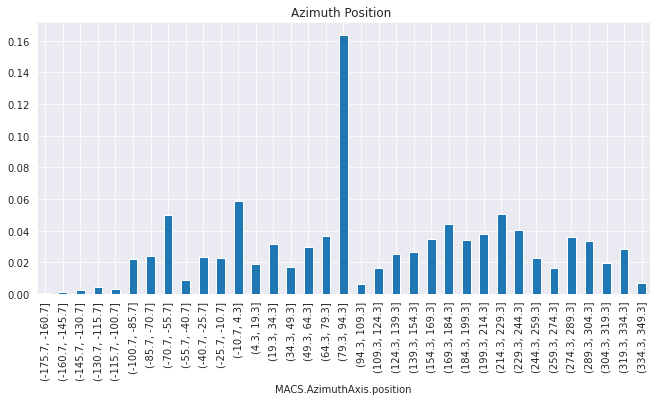

In [367]:
(azimuth_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Azimuth Position ");

In [380]:
wind_dir_vals = df_track.groupby(pd.cut(df_track['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.windDirection'].count()

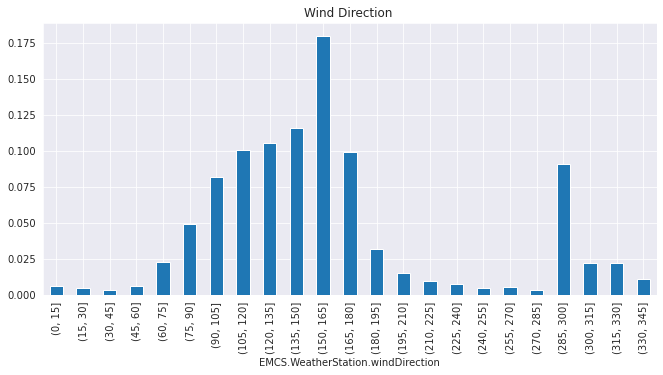

In [381]:
(wind_dir_vals/df_track.shape[0]).plot(kind="bar");
plt.title("Wind Direction ");

In [384]:
wind_speed_vals = df_track.groupby(pd.cut(df_track['EMCS.WeatherStation.windDirection'], np.arange(0, 360, 15)))['EMCS.WeatherStation.meanWindSpeed'].max()

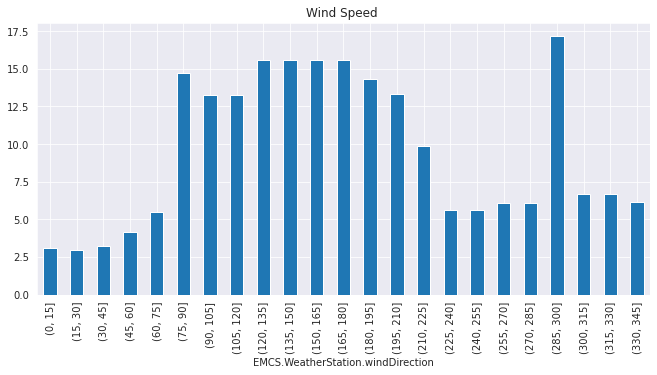

In [386]:
(wind_speed_vals).plot(kind="bar");
plt.title("Wind Speed ");

In [358]:
df.columns

Index(['TimeStampLong', 'OE.ObservingEngine.slowGuideErrorB',
       'MACS.ElevationAxis.position',
       'OE.ObservingEngine.currentObservingState',
       'ECS.DomeRotation.actualPosition', 'EMCS.WeatherStation.windDirection',
       'MACS.AzimuthAxis.position', 'ECS.UpperShutter.actualPosition',
       'MACS.AzimuthAxis.followingError', 'EMCS.WeatherStation.meanWindSpeed',
       'OE.ObservingEngine.slowGuideErrorA'],
      dtype='object')